In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import nltk  
col=['Id' , 'Entity' , 'Sentiment' , 'Content']
df_train=pd.read_csv('twitter_training.csv' , names=col)
df_train

,Id,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
df_test=pd.read_csv("twitter_validation.csv", names=col)
df_test

,Id,Entity,Sentiment,Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [6]:
print(df_train.shape)
print(df_train.columns)
print(df_train.dtypes)

(74682, 4)
Index(['Id', 'Entity', 'Sentiment', 'Content'], dtype='object')
Id            int64
Entity       object
Sentiment    object
Content      object
dtype: object


In [7]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


,Id
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [8]:
df_train.isnull().sum()
col=['Id' , 'Entity' , 'Sentiment' , 'Content']
df_train

,Id,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [9]:
df_train.Sentiment.unique()
df_train.Sentiment=df_train.Sentiment.replace('Irrelevant' , 'Neutral')
df_test.columns = ['Id' , 'Entity' , 'Sentiment' , 'Content']
df_test

,Id,Entity,Sentiment,Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [10]:
df_test.Sentiment=df_train.Sentiment.replace('Irrelevant' , 'Neutral')
df_train.Sentiment.unique()
sentiment_count=df_train.Sentiment.value_counts()
sentiment_count

Neutral     31308
Negative    22542
Positive    20832
Name: Sentiment, dtype: int64

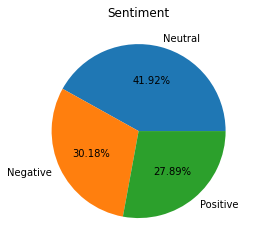

In [11]:
y=['Neutral','Negative','Positive']
plt.pie(sentiment_count,labels=y , autopct='%.2f%%')
plt.title("Sentiment")
plt.show()

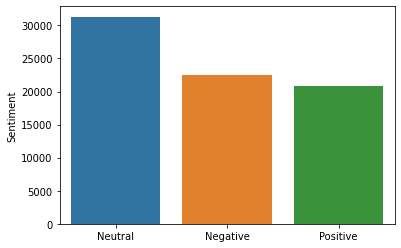

In [12]:
sb.barplot(y=sentiment_count,x=['Neutral','Negative','Positive'],)
plt.show()

In [13]:
df_train.Entity.unique()


array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [14]:
df_train.Entity.value_counts()

TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)               

In [16]:
y=df_train.Entity.value_counts().sort_values(ascending=False)
y

TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Overwatch                            2334
Xbox(Xseries)                        2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)               

In [17]:
entity_head=y.head(10)
entity_head

TomClancysRainbowSix         2400
MaddenNFL                    2400
Microsoft                    2400
LeagueOfLegends              2394
CallOfDuty                   2394
Verizon                      2382
CallOfDutyBlackopsColdWar    2376
ApexLegends                  2376
Facebook                     2370
WorldOfCraft                 2364
Name: Entity, dtype: int64

In [18]:
entity_top3_df=entity_head.head(3)
entity_top3_df
entity_top3=entity_top3_df.index.tolist()
entity_top3

['TomClancysRainbowSix', 'MaddenNFL', 'Microsoft']

In [19]:
sentiment_by_entity=df_train.loc[df_train['Entity'].isin(entity_top3)].groupby('Entity')['Sentiment'].value_counts().sort_index()
sentiment_by_entity


Entity                Sentiment
MaddenNFL             Negative     1710
                      Neutral       294
                      Positive      396
Microsoft             Negative      774
                      Neutral      1020
                      Positive      606
TomClancysRainbowSix  Negative     1122
                      Neutral       750
                      Positive      528
Name: Sentiment, dtype: int64

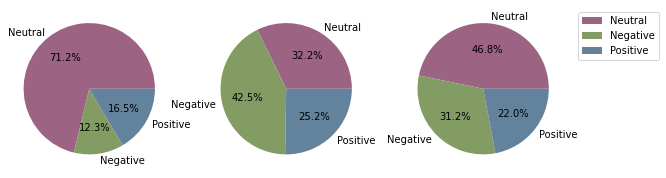

In [20]:
plt.figure(figsize=(10,5))
y=['Neutral' , 'Negative' , 'Positive']
color=['#9C6383' , '#839C63' , '#63839C']

plt.subplot(1,3,1)
plt.pie(sentiment_by_entity[:3] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.subplot(1,3,2)
plt.pie(sentiment_by_entity[3:6] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.subplot(1,3,3)
plt.pie(sentiment_by_entity[6:] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left' , fontsize="10")

In [21]:
df_train

,Id,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [24]:
freq = nltk.FreqDist('positive')
d = pd.DataFrame({'Hashtag':list(freq.keys()),
                  'Count': list(freq.values())})
     

In [25]:
d.head()

,Hashtag,Count
0,p,1
1,o,1
2,s,1
3,i,2
4,t,1


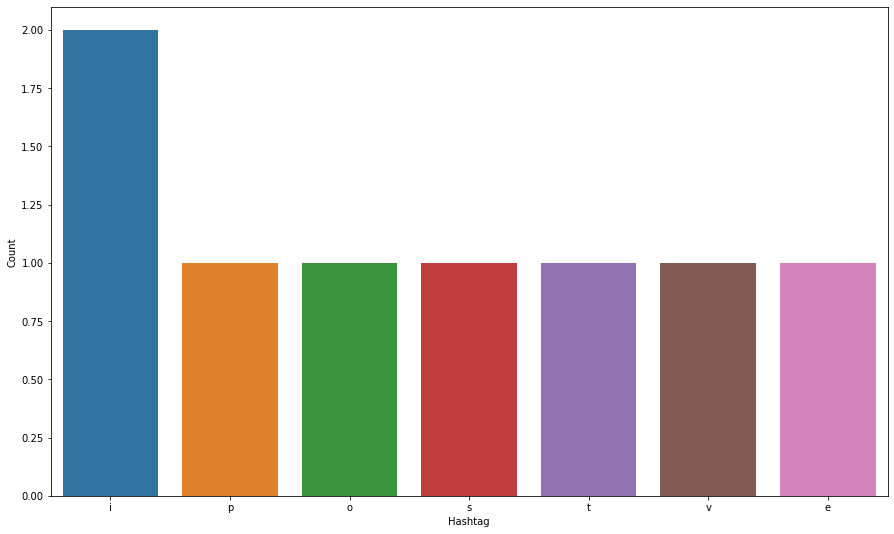

In [27]:
d = d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sb.barplot(data=d,x='Hashtag' , y='Count')
plt.show()